<center>
<h1 style="color:red; font-size:70px;"> Esercitazione 6</h1>

In questo notebook sono riportati gli esercizi per la cui soluzione è necessario il codice **md.6**: i grafici qui presenti sono in python, ma nella cartella è possibile trovarne di analoghi fatti con gnuplot. Sono anche riportati i comandi per creare i plot, salvati in dei file '.gnuplot'. 

Per eseguire il notebook sui computer di laboratorio, è necessario lanciare il seguente comando e selezionare il corretto kernel python.

<center>

`module load python3/anaconda`
<center>

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

from scipy.stats import norm
from scipy.optimize import curve_fit

<center>

## Simulazione di proteine
</center>

Le proteine presentano uno stato a bassa entropia, detto configurazione nativa, che al di sopra di una certa temperatura va incontro ad una transizione di fase del primo ordine verso una configurazione disordinata. Un modello che descrive questo cambiamento configurazionale della proteina è il modello di Go, che si basa sulla conoscenza della configurazione nativa della proteina.

### Modello di Go

La conoscenza della configurazione nativa consente di definire la mappa dei contatti, ossia di determinare la tipologia di interazione dei costituenti della proteina in base ad una distanza di threshold. L'interazione, tipo Lennard-Jones, 

$$
U\left(\left\{r_i\right\}\right)\,=\,\sum_{i<j}\frac{c_{10}}{|r_i\,-\,r_j|^{10}}\,-\,\sum_{i<j}\frac{c_6}{|r_i\,-\,r_j|^6}M_{ij}
$$

è attrattiva per quelle coppie di atomi che sono in contatto nella configurazione nativa, altrimenti repulsiva. Questo implica che la conformazione nativa è per definizione il ground state del sistema in analisi.

<center>
<h1 style="color:blue; font-size:50px;"> Esercizio 2.11</h1>

L'obiettivo di questo esercizio è valutare il processo di unfolding e refolding di una proteina. Per distinguere lo stato configurazionale della proteina lavoriamo con due parametri d'ordine differenti, ossia 

$$
\begin{cases}
    q\left(\left\{r_i\right\}\right) \qquad \quad \,\, \qquad \rightarrow \qquad \text{frazione di contatti nativi} \\
    \\
    dRMSD\left(\left\{r_i\right\}\right) \qquad \rightarrow \qquad \text{confronto fra distanze relative attuali ed native}
\end{cases}
$$

Dopo un periodo di rilassamento della proteina, la stessa viene posta per 200 ps ad alta temperatura in modo tale da acquisire una configurazione a maggior entropia. La temperatura adeguata è identificabile confrontando l'energia termica con l'energia di legame media
$$
U\left(r_0\right)\,=\,-\frac{2\,c_6}{5}\left(\frac{3\,c_6}{5\,c_{10}}\right)^{3/2}
$$

La temperatura a cui si ha l'uguaglianza dei due contributi è

$$
T\,=\,\frac{1}{k_B} U\left(r_0\right)\,\simeq\,44.73\,\text{K}
$$

La prima parte della simulazione l'ho quindi effettuata a 100 Kelvin. La seconda parte della simulazione, ossia quella del refolding, comporta il ritorno alla configurazione nativa.

Come prima analisi, ho studiato l'unfolding ed il refolding della proteina con 

$$
\gamma\,=\,1
$$

Nel grafico seguente è possibile osservare l'andamento dei due parametri d'ordine introdotti in precedenza al passare del tempo. Notiamo come sia evidente il cambio di temperatura (e quindi di dinamica) a 200 ps dall'inizio della simulazione.

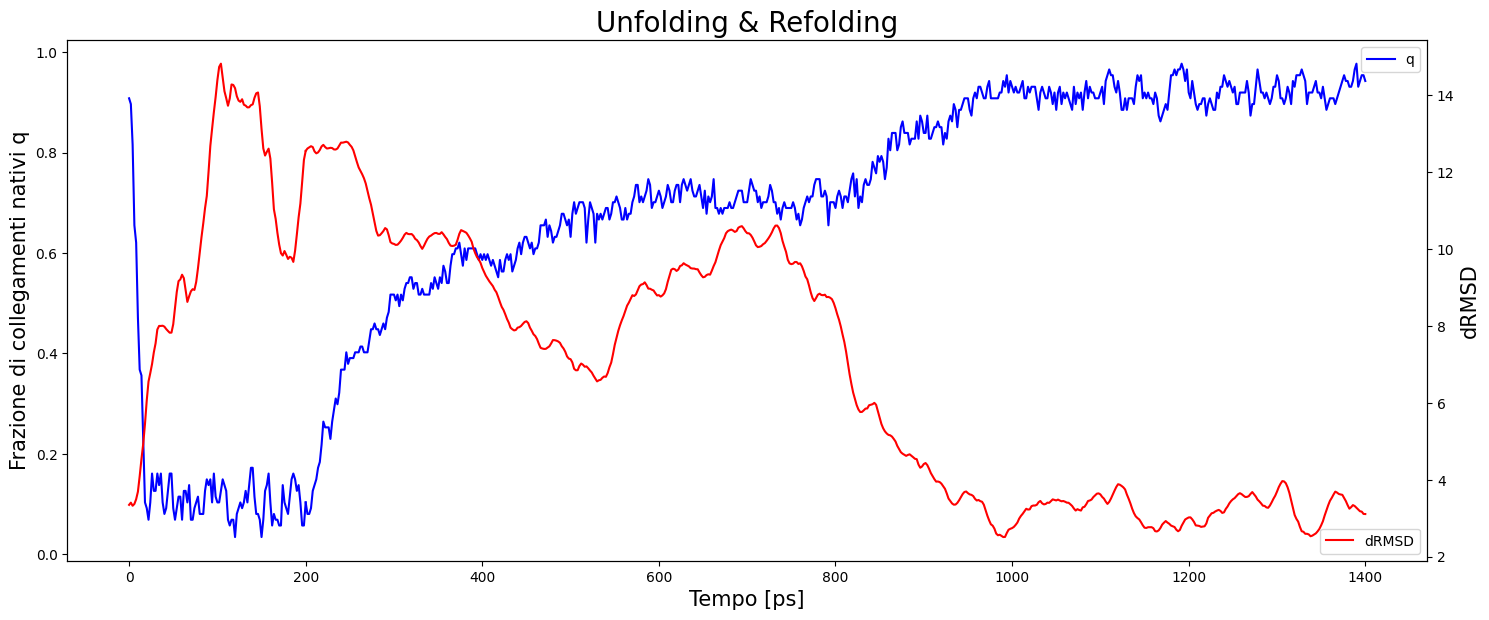

In [36]:
fig, ax1 = plt.subplots(figsize=(15, 6))

unfolding = np.loadtxt('unfold_fold/unfold.out')
refolding = np.loadtxt('unfold_fold/refold.out')

ax1.plot(unfolding[:, 0], unfolding[:, 6], color = 'blue',)
ax1.plot(refolding[:, 0] + 200, refolding[:, 6], color = 'blue', label = 'q')
ax1.set_xlabel(r"Tempo [ps]", fontsize = 15)
ax1.set_ylabel(r"Frazione di collegamenti nativi q", fontsize = 15)
ax1.tick_params(axis='y')
ax1.legend(loc = 'upper right')


# Crea un secondo asse Y condividendo lo stesso asse X
ax2 = ax1.twinx()
ax2.plot(unfolding[:, 0], unfolding[:, 7], color = 'red',)
ax2.plot(refolding[:, 0] + 200, refolding[:, 7], color = 'red', label = 'dRMSD')
ax2.set_ylabel(r"dRMSD", fontsize = 15)
ax2.tick_params(axis='y')
ax2.legend(loc = 'lower right')

# Mostra il grafico con legenda
fig.tight_layout()  # Per evitare sovrapposizioni
plt.title("Unfolding & Refolding", fontsize = 20)
plt.show()


## Dipendenza su gamma

Ho effettuato la stessa simulazione precedente, ma per 3 valori di gamma differenti. In particolare, ho lavorato con

$$
\gamma \in \left\{0.5,\,1.0,\,1.5\right\}
$$

Ho osservato che non si ha forte dipendenza sul valore della costante viscosa $\gamma$, sebbene per piccoli valori della stessa il refolding sia leggermente più rapido.

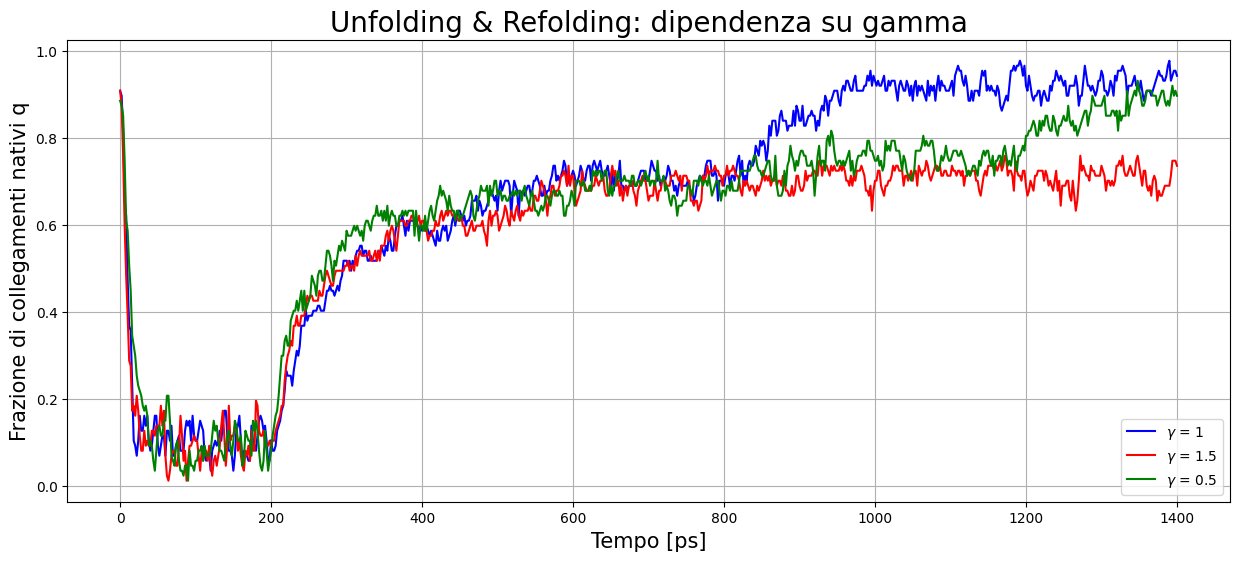

In [5]:
fig = plt.figure(figsize=(15, 6))

unf_1 = np.loadtxt('unfold_fold/dipG/unfold_1.out')
ref_1 = np.loadtxt('unfold_fold/dipG/refold_1.out')
unf_2 = np.loadtxt('unfold_fold/dipG/unfold_1.5.out')
ref_2 = np.loadtxt('unfold_fold/dipG/refold_1.5.out')
unf_3 = np.loadtxt('unfold_fold/dipG/unfold_0.5.out')
ref_3 = np.loadtxt('unfold_fold/dipG/refold_0.5.out')


plt.plot(unf_1[:, 0], unf_1[:, 6], color = 'blue',)
plt.plot(ref_1[:, 0] + 200, ref_1[:, 6], color = 'blue', label = r'$\gamma$ = 1')

plt.plot(unf_2[:, 0], unf_2[:, 6], color = 'red',)
plt.plot(ref_2[:, 0] + 200, ref_2[:, 6], color = 'red', label = r'$\gamma$ = 1.5')

plt.plot(unf_3[:, 0], unf_3[:, 6], color = 'green',)
plt.plot(ref_3[:, 0] + 200, ref_3[:, 6], color = 'green', label = r'$\gamma$ = 0.5')


plt.xlabel(r"Tempo [ps]", fontsize = 15)
plt.ylabel(r"Frazione di collegamenti nativi q", fontsize = 15)
plt.title(r"Unfolding & Refolding: dipendenza su gamma", fontsize = 20)
plt.legend(loc = 'best')
plt.grid(True)

plt.show()

<center>
<h1 style="color:blue; font-size:50px;"> Esercizio 2.12</h1>

Siamo ora interessati a calcolare quali siano i tassi di folding ed unfolding della proteina a temperatura di 10 Kelvin. Questi parametri compaiono nella master equation che descrive la probabilità di passaggio in un sistema a due stati A e B, come può essere quello di proteina foldata ed unfoldata. La master equation è

$$
\frac{dp\left(A,\,t\right)}{dt}\,=\,p\left(B,\,t\right)k_{ba}\,-\,p\left(A,\,t\right)k_{ab},
$$

dove $k_{ab}$ è la probabilità di raggiungere lo stato B per unità di tempo, mentre $k_{ba}$ è quella di raggiungere lo stato A. La curva descritta dal parametro d'ordine q ha un andamento tipo

$$
\alpha \left[1\,-\,\exp{\left(-\frac{t}{\beta}\right)}\right],
$$

che consente di valutare i rate come

$$
k_{ba}\,=\,\frac{\alpha}{\beta}
$$

$$
k_{ab}\,=\,\frac{1\,-\,\alpha}{\beta}
$$

### Processo di Fit

Per ottenere un fit migliore, ho eseguito 100 simulazioni di refolding, in modo da ottenere un andamento mediato che risentisse in maniera limitata delle fluttazioni statistiche caratteristiche dell'evoluzione temporale della proteina nel modello di Go. Il numero elevato di simulazioni mi ha consentito di osservare come lo stato con 

$$
q \simeq 0.7
$$

sia uno stato metastabile, poichè per certi semi del generatore di numeri casuali è possibile andare oltre a tale valore fino ad avere parametro d'ordine circa pari ad uno.

In [6]:
N = 101

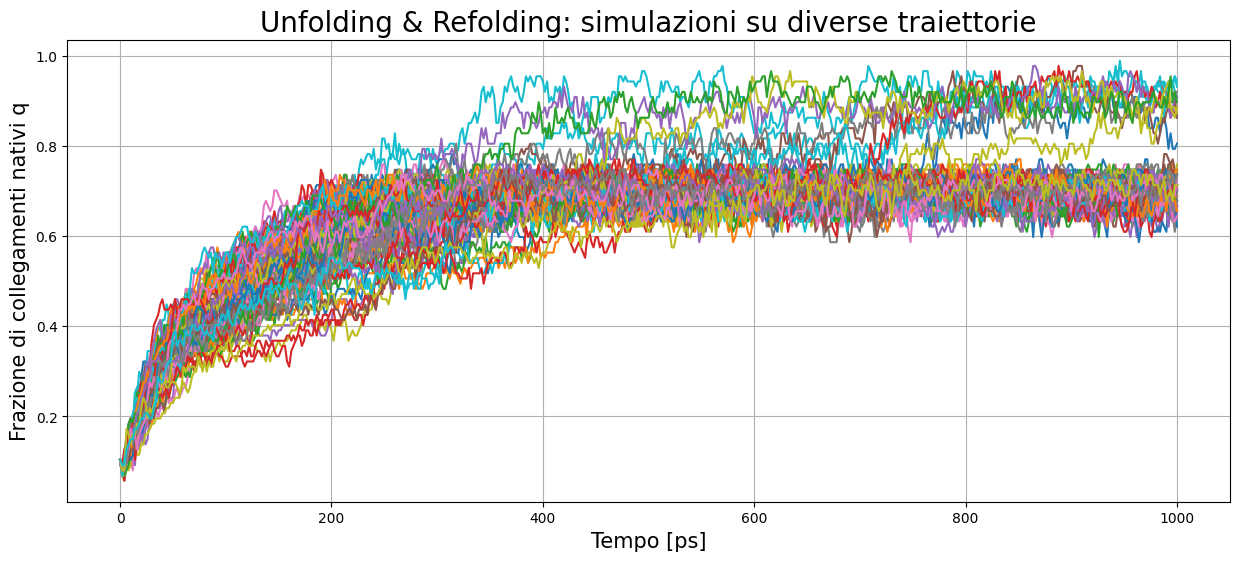

In [7]:
fig = plt.figure(figsize=(15, 6))

for i in range(1, N):
    ref = np.loadtxt('rateCalc/refolding_' + str(i) + '.out')
    plt.plot(ref[:, 0], ref[:, 6])


plt.xlabel(r"Tempo [ps]", fontsize = 15)
plt.ylabel(r"Frazione di collegamenti nativi q", fontsize = 15)
plt.title(r"Unfolding & Refolding: simulazioni su diverse traiettorie", fontsize = 20)
plt.grid(True)

plt.show()

In [4]:
def exp_model(x, a, b):
    return a * (1 - np.exp(-x/b))

I tassi di folding ed unfolding sono i seguenti: 

Folding rate: 0.0097
Unfolding rate: 0.0039


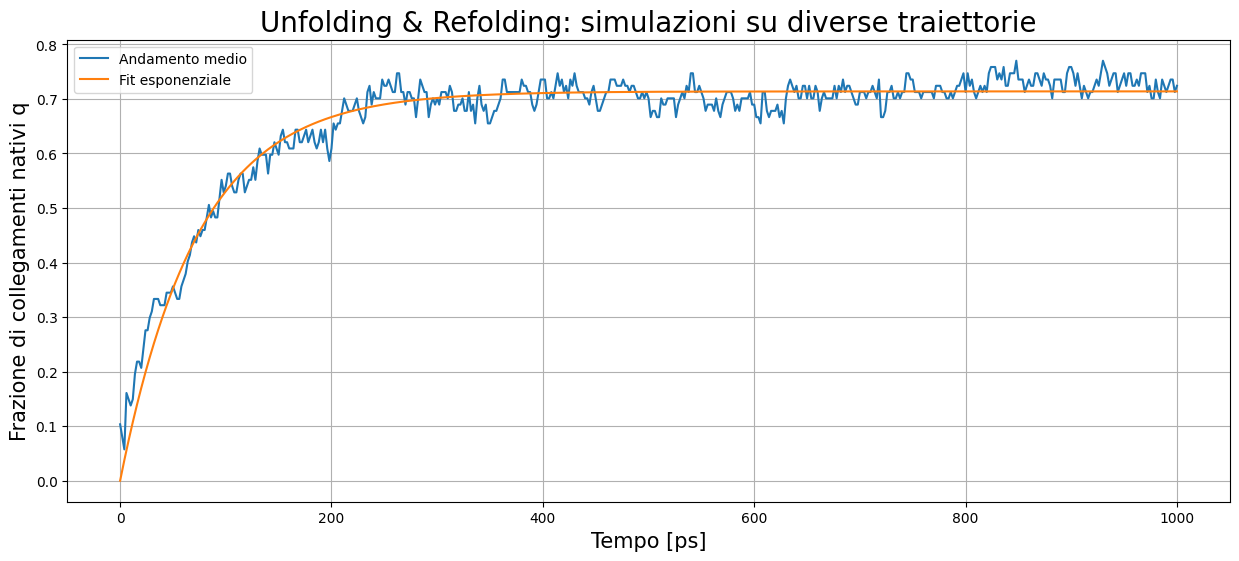

In [8]:
fig = plt.figure(figsize=(15, 6))

res = np.loadtxt('rateCalc/refolding_1.out')
mean = res[:, 6]

for i in range(2, N):
    res = np.loadtxt('rateCalc/refolding_1.out')
    mean = mean + res[:, 6]

if N > 1:
    mean = mean/(N-1)

#-----------------------------------#
#          Fit esponenziale         #
#-----------------------------------#
params, covariance = curve_fit(exp_model, res[:, 0], mean)
a = params[0]
b = params[1]
y_fit = exp_model(res[:, 0], a, b)

print("I tassi di folding ed unfolding sono i seguenti: ")
print("")
print("Folding rate: " + str(round(a/b, 4)))
print("Unfolding rate: " + str(round((1-a)/b, 4)))

plt.plot(res[:, 0], mean, label = 'Andamento medio')
plt.plot(res[:, 0], y_fit, label = 'Fit esponenziale')
plt.xlabel(r"Tempo [ps]", fontsize = 15)
plt.ylabel(r"Frazione di collegamenti nativi q", fontsize = 15)
plt.title(r"Unfolding & Refolding: simulazioni su diverse traiettorie", fontsize = 20)
plt.legend(loc = 'best')
plt.grid(True)

plt.show()